# Running the politeness R package in Colab

**Before you get started, save your own copy of this notebook, from the File menu.**



The politeness package depends on grammar parsing to understand the structure of sentences (e.g. the difference between "I understand" and "I don't understand"). However, the best grammar parsing tools are all in Python, which requires building a connection between R and Python, and installing the right tools on either side of the connection. The details of this connection vary a lot depending on the user's specific computer, operating system, and so on. So  many users interested in the package have found this difficult to install on their own local machines.

This Colab notebook is intended to help newer users to get a quick start using the package, without having learn all the tricky little things about their
computer first - though if you find the package useful, it is easier in the long run to get it running locally!

Colab runs code on a single, common cloud computing setup. It is usually used for Python, but can handle R code, as well. This makes it ideal for our purposes. Installing the right tools can be slow on the cloud, but at least it is exactly the same for everyone. That means if you just follow the code below, you can analyse your data using the full power of the politeness package.




## Installation

The first block of code installs several necessary packages. The politeness package is needed, of course. But we also need the colabr package, which will help build the R-to-Python connection. And we need the devtools package to install colabr.

WARNING: this code will take a while to complete - 15 minutes, on average. And at the end, it will restart (and say that it crashed). That is normal! Press the play button on this code block, and let it run in the background. Go grab a cup of tea, and return when the code is done.

In [ ]:
# Install devtools, spacyr, and colabr
install.packages(c('devtools','politeness','tidyverse'))
devtools::install_github('hansquiogue/colabr', force = TRUE)

# Download anaconda (might take a while)
# Don't worry if session crashed, notebook is restarted
colabr::download_anaconda()



Now that the pieces are in place, we need to connect them, and install spacy. (we also need to reload the R packages due to the restart). Don't worry about re-running the lines above, just keep moving down the notebook.

In [ ]:
library(colabr)

setup_anaconda()

setup_spacyr()

# Using the politeness package

Let's start analysing some text! Here is a quick example using the politeness function to parse some example sentences. Take a look at the feature counts, and notice the grammar parsing at work.

In [ ]:
library(politeness)
library(tidyverse)

sample_text <- c("I understand how this works.",
                 "I don't understand how this works.",
                 "I am happy.",
                 "I am not happy.")

full_features<-politeness(sample_text,parser="spacy")

dim(full_features)
print(full_features)



Compare the output above to the simple politeness output below, that does not use grammar parsing. You should first notice there are many fewer features (32 vs 39). For example, the acknowledgement feature, which picked up "I understand" in the first text, is not calculated at all.

You may also notice that some of the feature counts have changed. For example, look at the Positive.Emotion feature. In the simple example below, the final text, "I am not happy", is counted as positive, because it counts words one at a time. This seems obviously wrong, and yet almost all dictionary approaches (e.g. LIWC) make this same mistake. However, in the full features example above, SpaCy is used to understand the whole sentence. Thus, the final text is (correctly) counted as Negative.Emotion instead.



In [ ]:
sample_text <- c("I understand how this works.",
                 "I don't understand how this works.",
                 "I am happy.",
                 "I am not happy.")

simple_features<-politeness(sample_text)
print("")

dim(simple_features)
print(simple_features)

# Uploading your data

Remember, colab is running on a cloud computer. So to analyse your text data, you need to get that data onto the cloud.

To see how this is done, let's practice with an example file. In a different browser window, go to this website and download the file:

https://mikeyeomans.info/files/phone_offers.csv

Once you've downloaded it to your computer, upload it to colab. The easiest way to upload a file is on to click on the folder icon on the left side bar, which will open up the files window. You can then drag and drop the file from the folder on your computer into the Files window. When you've done this correctly, the Files window should look something like this (notice how `phone_offers.csv` appears in colab):



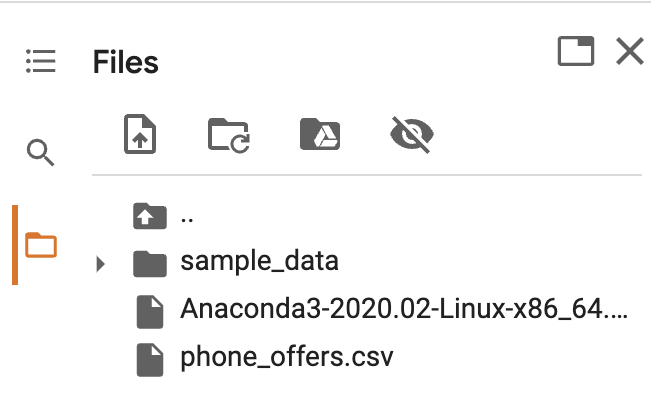



# Analysing your data

Now that your data is on the cloud, we can analyze it. Let's load it into R just as you would on your local computer, using `read_csv()`.

We can then explore the dataset to make sure it looks like we expect. The example file should have 355 rows and 3 columns. The three columns are called `textID`, `message`, and `condition`. The `message` column contains the text we want to analyse.

NOTE: The ID column is important! This is what will allow you to take the output here and link it back up with the rest of your dataset. Before you upload your own data, make sure it has a column that contains a unique ID number for every row, and make sure the original data on your own machine has the same ID column.

In [ ]:
phone_offers<-read_csv("phone_offers.csv")

print(dim(phone_offers))

print(head(phone_offers))


Next, let's calculate the politeness features from the text column. This should produce a matrix with 355 rows (the same as the original data) and 39 columns (one for every politeness feature).

The `head()` function displays the first six rows, so you can check that it works.

In [ ]:
phone_polite <- politeness(phone_offers$message, parser="spacy")

print(dim(phone_polite))

head(phone_polite)



# Linking the output with your original data

Now that you've calculated the politeness features, you will probably want to save the feature counts, download them to your local machine, and analyse them on your own computer. This is all done using the `tidyverse` package - if you don't have it on your own computer, install it! It's extremely useful, in so many different ways (even if you never use the politeness package again).

Let's demonstrate how you will link the features up to the original data. First, we are going to connect the politeness features to the ID variable using `bind_cols`. Notice that there is now an extra column, textID.




In [ ]:
phone_polite_ID<-bind_cols(phone_offers %>%
                              select(textID),
                           phone_polite)

head(phone_polite_ID)

When you get the politeness features onto your local machine, you can then connect the feature data to your old data using `left_join`. This add new columns to your old dataset, and will use the ID column to make sure the counts all end up on the correct row.

In this example the final dataset, `phone_offers_full`, will have 42 columns - the original three, along with the 39 new feature count columns.

In [ ]:
phone_offers_full<-phone_offers %>%
  left_join(phone_polite_ID)

dim(phone_offers_full)

head(phone_offers_full)

# Downloading the final data to your computer

Now that you know how to link up the feature counts to your old data, it's time to download the feature count data onto your local machine. this is a two-step process. First, you will save the feature count data to colab, using the `write.csv()` function.

In [ ]:
write.csv(phone_polite_ID,file="phone_polite_ID.csv",row.names=F)

This will create a new file in the file window on the left. When you're done, the file window should look something like this. It may take a few seconds for the file to show up in the window (if it is taking a long time, right click the file window and select "refresh" - that should make it appear).

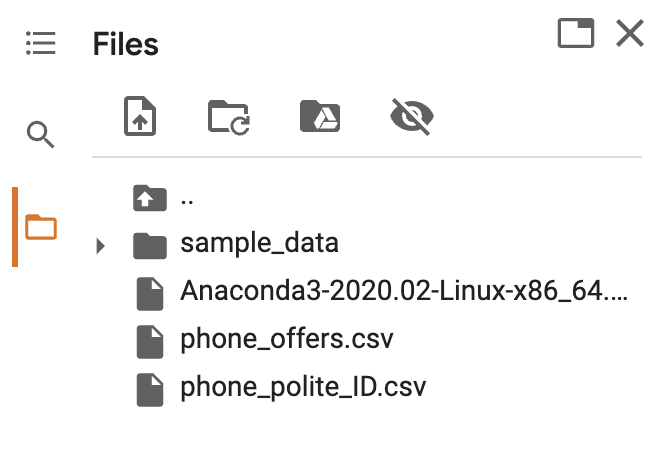


The final step is to download that file to your own computer. This is easy - just right-click on the name of the final file, and click download. You now have the politeness feature counts to use in your analyses!